In [1]:
import pandas as pd
import numpy as np


In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature**power
    return poly_dataframe

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [5]:
poly_data=polynomial_dataframe(sales['sqft_living'],1)
poly_data['price']=sales['price']


In [6]:
poly_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


In [7]:
poly_data['power_1'].to_frame().shape

(21613, 1)

In [8]:
print(poly_data['power_1'].to_frame())

       power_1
19452    290.0
15381    370.0
860      380.0
18379    384.0
4868     390.0
...        ...
8092    9640.0
9254    9890.0
3914   10040.0
7252   12050.0
12777  13540.0

[21613 rows x 1 columns]


In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_data['power_1'].to_frame(),poly_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

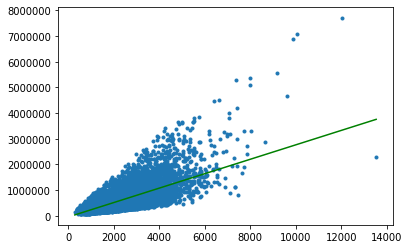

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly_data['power_1'],model.predict(poly_data['power_1'].to_frame()),color='green')
plt.scatter(poly_data['power_1'],poly_data['price'],marker='.')






In [11]:
import seaborn as sns

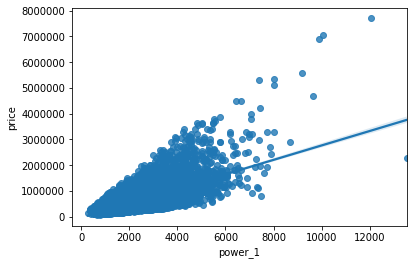

In [12]:
sns.regplot(poly_data['power_1'],poly_data['price'])

In [13]:
poly2_data=polynomial_dataframe(sales['sqft_living'],2)
poly2_data['price']=sales['price']

poly2_data.head()



,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0
860,380.0,144400.0,245000.0
18379,384.0,147456.0,265000.0
4868,390.0,152100.0,228000.0


In [14]:
x=poly2_data.drop(['price'],axis=1)
x.shape

(21613, 2)

In [15]:
y=poly2_data['price']
y.shape

(21613,)

In [16]:
model2=LinearRegression()
model2.fit(x,poly_data['price'].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

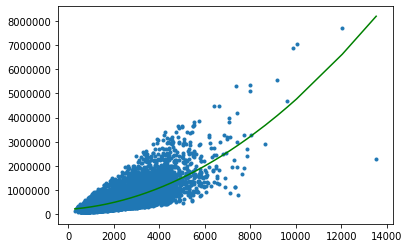

In [17]:
plt.plot(poly2_data['power_1'],model2.predict(x),color='green')
plt.scatter(poly2_data['power_1'],poly2_data['price'],marker='.')



In [18]:
poly3_data=polynomial_dataframe(sales['sqft_living'],3)
poly3_data['price']=sales['price']

poly3_data.head()

,power_1,power_2,power_3,price
19452,290.0,84100.0,24389000.0,142000.0
15381,370.0,136900.0,50653000.0,276000.0
860,380.0,144400.0,54872000.0,245000.0
18379,384.0,147456.0,56623104.0,265000.0
4868,390.0,152100.0,59319000.0,228000.0


In [19]:
x2=poly3_data.drop(['price'],axis=1)
x2.shape

(21613, 3)

In [20]:
model3=LinearRegression()
model3.fit(x2,poly_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

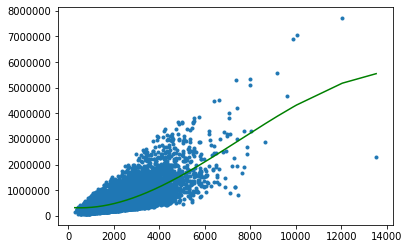

In [21]:
plt.plot(poly3_data['power_1'],model3.predict(x2),color='green')
plt.scatter(poly3_data['power_1'],poly3_data['price'],marker='.')

In [22]:
poly15_data=polynomial_dataframe(sales['sqft_living'],15)
poly15_data['price']=sales['price']

poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,245000.0
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,265000.0
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,228000.0


In [23]:
x15=poly15_data.drop(['price'],axis=1)
x15.shape

(21613, 15)

In [24]:
model15=LinearRegression()
model15.fit(x15,poly_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

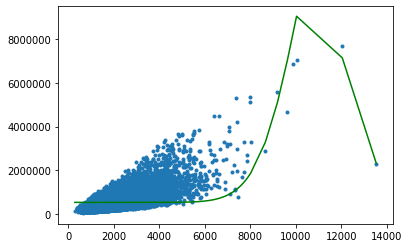

In [25]:
plt.plot(poly15_data['power_1'],model15.predict(x15),color='green')
plt.scatter(poly15_data['power_1'],poly15_data['price'],marker='.')

In [26]:
test=pd.read_csv('wk3_kc_house_test_data.csv')
train=pd.read_csv('wk3_kc_house_train_data.csv')
validation=pd.read_csv('wk3_kc_house_valid_data.csv')

In [27]:
set1=pd.read_csv('wk3_kc_house_set_1_data.csv')
set2=pd.read_csv('wk3_kc_house_set_2_data.csv')
set3=pd.read_csv('wk3_kc_house_set_3_data.csv')
set4=pd.read_csv('wk3_kc_house_set_4_data.csv')

In [28]:
train = train.sort_values(['sqft_living','price'])
test = test.sort_values(['sqft_living','price'])
validation = validation.sort_values(['sqft_living','price'])
set1 = set1.sort_values(['sqft_living','price'])
set2 = set2.sort_values(['sqft_living','price'])
set3 = set3.sort_values(['sqft_living','price'])
set4 = set4.sort_values(['sqft_living','price'])


In [29]:
def get_poly_model(set_data):
        
    poly15_data15=polynomial_dataframe(set_data['sqft_living'],15)
    poly15_data15['price']=set_data['price']

    x_15=poly15_data15.drop(['price'],axis=1)
    

    model_15=LinearRegression()
    model_15.fit(x_15,poly15_data15['price'])
    
    return poly15_data15,model_15


In [30]:
def get_coef(set_data):
    poly15_data15, model_15 = get_poly_model(set_data)
    
    return model_15.coef_
def plot_fitted_line(set_data):
    poly15_data15, model_15 = get_poly_model(set_data)
    x_15=poly15_data15.drop(['price'],axis=1)
    return (plt.scatter(poly15_data15['power_1'],poly15_data15['price'],marker='.'),plt.plot(poly15_data15['power_1'],model_15.predict(x_15),color='green'))


In [31]:
set_1_coef = get_coef(set1)
print (set_1_coef[14])

-3.8020150372957947e-16


(<matplotlib.collections.PathCollection at 0x18d1922f608>,
 [<matplotlib.lines.Line2D at 0x18d1920c7c8>])

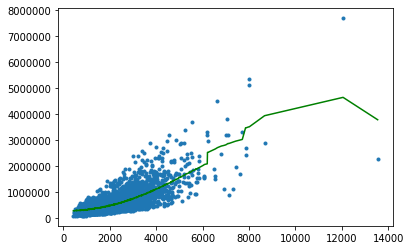

In [33]:
plot_fitted_line(set1)

In [35]:
set_2_coef = get_coef(set2)
print (set_2_coef[14])

1.3401533436541994e-15


(<matplotlib.collections.PathCollection at 0x18d192a06c8>,
 [<matplotlib.lines.Line2D at 0x18d192be188>])

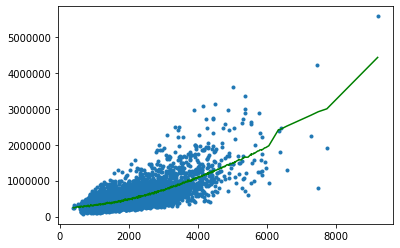

In [36]:
plot_fitted_line(set2)

In [37]:
set_3_coef = get_coef(set3)
print (set_3_coef[14])

-2.591683811604783e-16


(<matplotlib.collections.PathCollection at 0x18d1931d4c8>,
 [<matplotlib.lines.Line2D at 0x18d192fc2c8>])

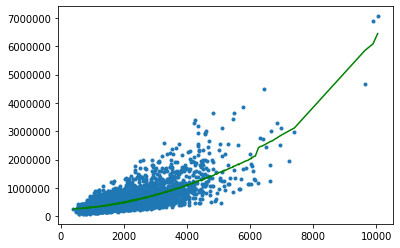

In [38]:
plot_fitted_line(set3)

In [39]:
set_4_coef = get_coef(set4)
print (set_4_coef[14])

-3.2211089991161973e-16


(<matplotlib.collections.PathCollection at 0x18d19387cc8>,
 [<matplotlib.lines.Line2D at 0x18d19368188>])

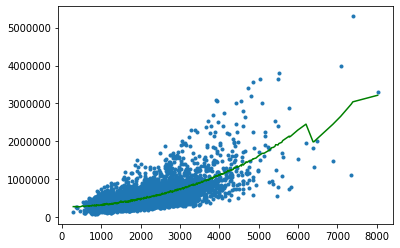

In [40]:
plot_fitted_line(set4)

In [42]:
def plot_degree(data1, data2, degree):
    poly_data = polynomial_dataframe(data1['sqft_living'], degree)
    validation = polynomial_dataframe(data2['sqft_living'], degree)
    my_features = poly_data.columns
    my_features_valid = validation.columns
    poly_data['price'] = data1['price']
    validation['price'] = data2['price']
    model = LinearRegression()
    model.fit(poly_data[my_features], poly_data['price'])
    return np.sum((model.predict(validation[my_features]) - validation['price'])**2)

In [43]:
range_list = []
for i in range(1,16):
    range_list.append((plot_degree(train, validation, i),i))
min(range_list)

(623160699388216.0, 7)

In [45]:
plot_degree(train, test, 7)

136759029983675.89